In [1]:
!pip install diffusers
!pip install transformers
!pip install sentencepiece

!pip install sacremoses
!pip install matplotlib

In [2]:
from diffusers import StableDiffusionPipeline
from transformers import pipeline
import torch
import matplotlib.pyplot as plt

# Initialize translation pipeline
translator = pipeline("translation", model='Helsinki-NLP/opus-mt-zh-en')


# Initialize Stable Diffusion pipeline
t2i = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5')
t2i = t2i.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Chinese Prompt: 一隻貓，一台電腦
English Prompt: A cat. A computer.


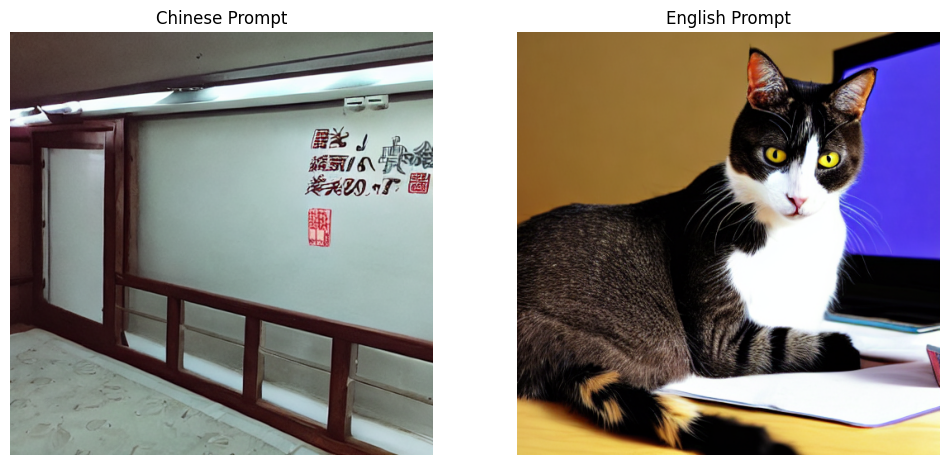

In [3]:
# Translate Chinese text to English
chinese_text = '一隻貓，一台電腦'
translation = translator(chinese_text)
english_prompt = translation[0]['translation_text']

# Generate images from both Chinese and English prompts
image_cn = t2i(chinese_text).images[0]
image_en = t2i(english_prompt).images[0]

# Display translated text and generated images
print(f'Chinese Prompt: {chinese_text}')
print(f'English Prompt: {english_prompt}')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_cn)
axs[0].set_title('Chinese Prompt')
axs[0].axis('off')
axs[1].imshow(image_en)
axs[1].set_title('English Prompt')
axs[1].axis('off')
plt.show()